In [1]:
#Preparation
%load_ext autoreload
%autoreload 2

import os
os.chdir('/home/dmitryhd/repos/vacancy_analysis')
#print(os.getcwd())
import vacan.processor.features as ft
import vacan.processor.data_model as dm
from vacan.features_config import FEATURES as ft_config

In [3]:
#Load raw vacs
dbmanager = dm.DBManager('vacan')
print('Getting raw vacancies...')
raw_vacs = dbmanager.get_raw_vacs()
print('Got {} raw vacancies from db.'.format(len(raw_vacs)))

Getting raw vacancies...
Got 65696 raw vacancies from db.


In [18]:
#Process vacancies
qualifier = ft.Qualifier(ft_config)
processor = ft.VacancyProcessor(qualifier)
proc_vacs = processor.process(raw_vacs)
print('Got %i processed vacancies.' % len(proc_vacs))

Got 5755 processed vacancies.


In [7]:
#Save for future
import pickle
with open('proc_vacs.pickle', 'wb') as proc_vacs_file:
    pickle.dump(proc_vacs, proc_vacs_file)

In [2]:
#Load pickle
import pickle
with open('proc_vacs.pickle', 'rb') as proc_vacs_file:
    proc_vacs_new = pickle.load(proc_vacs_file)

In [16]:
%matplotlib inline
import numpy as np
import pylab as P

def plot_histogram(data, max_el=1000000):
    valid_data = [element for element in data if element is not None and element < max_el]
    n, bins, patches = P.hist(valid_data, 20, normed=1, histtype='stepfilled')
    P.setp(patches, 'facecolor', 'g', 'alpha', 0.75)

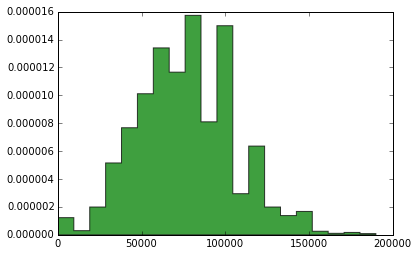

In [18]:
#print histogram of salaries
min_sal = [proc_vac.min_sal for proc_vac in proc_vacs_new]
max_sal = [proc_vac.max_sal for proc_vac in proc_vacs_new]
plot_histogram(min_sal, 200000)
#plot_histogram(max_sal, 200000)


In [19]:
def subset(vacancies, keyword):
    return [vac for vac in vacancies if vac.features[keyword]]

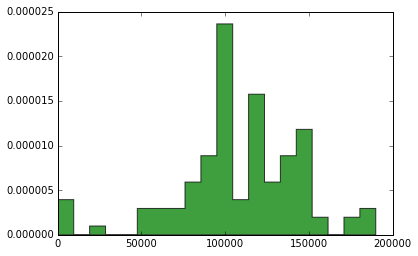

In [23]:
#print histogram of python salaries
min_sal = [proc_vac.min_sal for proc_vac in subset(proc_vacs_new, 'python')]
max_sal = [proc_vac.max_sal for proc_vac in subset(proc_vacs_new, 'python')]
#plot_histogram(min_sal, 200000)
plot_histogram(max_sal, 200000)